The dataset I will be working on consists of various artists and multiple songs.It was obtained from Kaggle.
Here I will be analyzing data based on different variables (columns) contribution

In [1]:
# We import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# reading the data
path=r'C:\Users\user\Downloads\Spotify_YouTube.csv'
df=pd.read_csv(path)

In [6]:
df.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20718.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,10358.500000,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,5980.915774,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5179.250000,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,10358.500000,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,15537.750000,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [8]:
# Getting information the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [9]:
df.shape

(20718, 28)

Based on the above data, the following observations can be made:
    1. This dataset contains 20718 rows and 28 columns.
    2. Some columns contain null values.
    3. Additional insights can be derived by investigating each column which may provide useful information about youtube or         spotify data

In [10]:
df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

Clean the data

In [16]:
# Remove the unnecessary columns from the dataset not needed for analysis
extra_cols=['Unnamed: 0','Title','Url_spotify','Uri','Url_youtube']
df.drop(extra_cols, axis=1, inplace=True)

In [17]:
df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Channel', 'Views',
       'Likes', 'Comments', 'Description', 'Licensed', 'official_video',
       'Stream'],
      dtype='object')

In [18]:
# Viewing the number of unique values of each column
df.nunique()

Artist               2079
Track               17841
Album               11937
Album_type              3
Danceability          898
Energy               1268
Key                    12
Loudness             9417
Speechiness          1303
Acousticness         3138
Instrumentalness     4012
Liveness             1536
Valence              1293
Tempo               15024
Duration_ms         14690
Channel              6714
Views               19245
Likes               17939
Comments            10485
Description         17395
Licensed                2
official_video          2
Stream              18461
dtype: int64

We can see that we have 2079 unique artists, 17841 tracks, 3 album types, 11937 albums and others

In [19]:
# Checking the number of null values in each column
df.isnull().sum()

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [20]:
# removing all the null values
df.dropna(inplace=True)

In [22]:
df.isnull().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Channel             0
Views               0
Likes               0
Comments            0
Description         0
Licensed            0
official_video      0
Stream              0
dtype: int64

In [23]:
df.shape

(19170, 23)

After removing the unnecessary columns and null values, we now have 19170 rows and 23 columns.

In [31]:
#Changing the datatype of the columns as per need
df['Views']=df['Views'].astype('int')
df['Likes']=df['Likes'].astype('int')
df['Comments']=df['Comments'].astype('int')

Exploratory Data Analysis

In [32]:
# Processing the data
df.head(10)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Tempo,Duration_ms,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,138.559,222640.0,Gorillaz,693555221,6220896,169907,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,92.761,200173.0,Gorillaz,72011645,1079128,31003,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,108.014,215150.0,Gorillaz,8435055,282142,7399,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,120.423,233867.0,Gorillaz,211754952,1788577,55229,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,167.953,340920.0,Gorillaz,618480958,6197318,155930,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
5,Gorillaz,DARE,Demon Days,album,0.760,0.891,11.0,-5.852,0.0372,0.022900,...,120.264,245000.0,Gorillaz,259021161,1844658,72008,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,3.238503e+08
6,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,single,0.716,0.897,4.0,-7.185,0.0629,0.012000,...,127.030,274142.0,Dom Dolla,451996,11686,241,"Gorillaz 'New Gold' ft. Tame Impala, Bootie Br...",False,True,1.066615e+07
7,Gorillaz,She's My Collar (feat. Kali Uchis),Humanz (Deluxe),album,0.726,0.815,11.0,-5.886,0.0313,0.007990,...,140.158,209560.0,SalvaMuñox,1010982,17675,260,𝐁̲𝐎̲𝐍̲𝐔̲𝐒̲:̲ Hu̳ma̳n̳z [̲̠̲𝐃̲̠̲𝐄̲̠̲𝐅̲̠̲𝐈̲̠̲𝐍̲̠...,False,False,1.596059e+08
8,Gorillaz,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),single,0.741,0.913,2.0,-3.340,0.0465,0.003430,...,120.012,213750.0,Gorillaz,24459820,739527,20296,Listen to Cracker Island: https://gorillaz.lnk...,True,True,4.267190e+07
9,Gorillaz,Dirty Harry,Demon Days,album,0.625,0.877,10.0,-7.176,0.1620,0.031500,...,192.296,230426.0,Gorillaz,154761056,1386920,39240,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,1.910747e+08


In [33]:
#Determining the top 10 artists on Spotify whose songs have more views
view=df.groupby('Artist')['Views'].agg('sum').reset_index().sort_values('Views', ascending=False).head(10)
view

,Artist,Views
263,Bruno Mars,10231841530
1163,Macklemore & Ryan Lewis,10122055560
375,Coldplay,9997277884
149,BLACKPINK,9392961989
780,J Balvin,8464877693
1347,Nicki Minaj,8017064073
512,"Earth, Wind & Fire",6414076580
1470,Post Malone,6394420209
1390,One Direction,6337601549
1349,Nicky Jam,6321868119


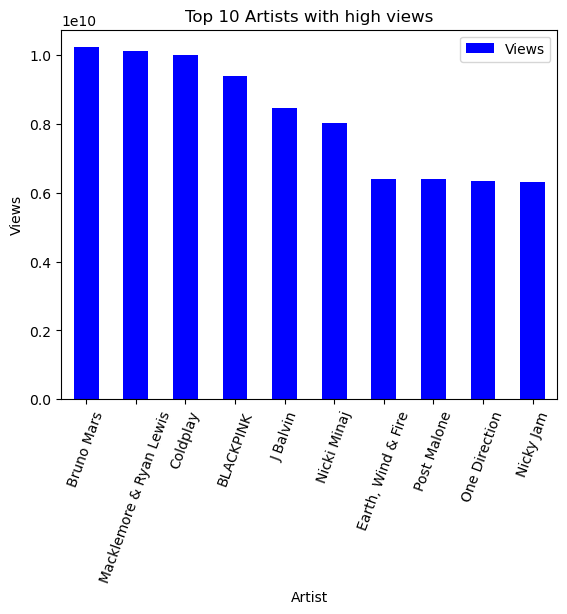

In [34]:
# Let us view our results
view.set_index('Artist', inplace=True)
view.plot(kind='bar', color='b')
plt.xlabel('Artist')
plt.ylabel('Views')
plt.title('Top 10 Artists with high views')
plt.xticks(rotation=70)
plt.show()

As we can see here, Bruno Mars was the most viewed artist with 10.23 bilion views. These figures highlight the popularity of these artists and their music, as well as the significant role of online video platforms in promoting and distributing music.

In [38]:
# Determine the top 10 artists with most likes on YouTube
df.groupby('Artist')['Likes'].agg('sum').sort_values(ascending= False).head(10)

Artist
BTS                139403808
BLACKPINK          132302505
Charlie Puth        86336925
Ed Sheeran          83543319
Justin Bieber       78579227
Billie Eilish       73338537
Imagine Dragons     72274477
Alan Walker         67977702
DJ Snake            67775831
Luis Fonsi          66908489
Name: Likes, dtype: int32

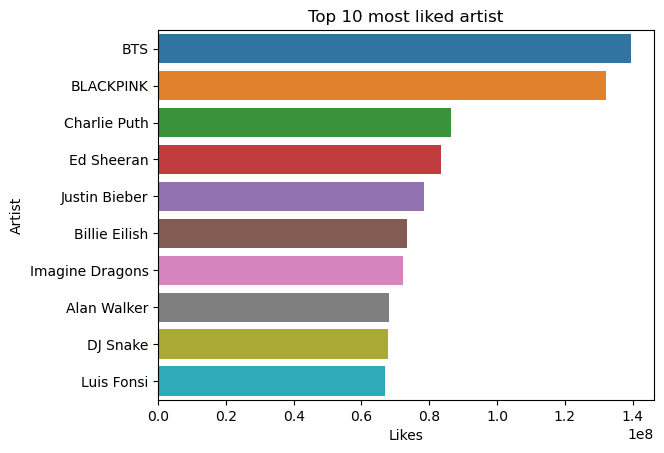

In [40]:
ax=df.groupby('Artist')['Likes'].agg('sum').reset_index()
bx=ax.sort_values('Likes', ascending=False).head(10)
sns.barplot(data=bx, x='Likes',y='Artist')
plt.title('Top 10 most liked artist')
plt.show()

As we can see here, BTS is the most liked artist with 140 milion likes and after this is Blackpink on second place.

In [43]:
# Determine the top 10 streamers on spotify
df.groupby('Artist')['Stream'].agg('sum').head(10)

Artist
$NOT                 1.127638e+09
$uicideboy$          1.745507e+09
(G)I-DLE             1.304212e+09
*NSYNC               1.427834e+09
070 Shake            4.647486e+08
112                  4.989639e+08
11:11 Music Group    1.786484e+08
1nonly               6.388919e+08
2 Chainz             1.995600e+09
21 Savage            2.186417e+09
Name: Stream, dtype: float64

In [47]:
cx=df.groupby('Artist')['Stream'].agg('sum').reset_index().sort_values('Stream', ascending=False).head(10)

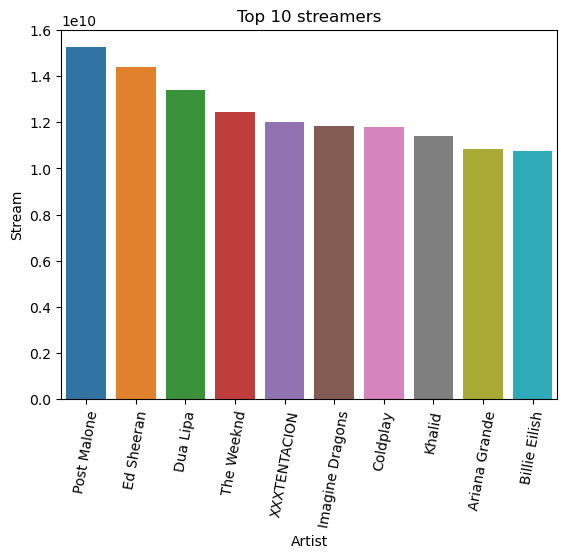

In [48]:
sns.barplot(data=cx, y='Stream', x='Artist')
plt.xticks(rotation=80)
plt.title('Top 10 streamers')
plt.show()

Post Malone is in the first position in streamers with 1.2 bilion streams.

In [49]:
# Who is the most commented artist on youtube
ax =df.groupby('Artist')['Comments'].sum().reset_index().sort_values(by='Comments', ascending=False).head(10)
ax

,Artist,Comments
151,BTS,39542659
149,BLACKPINK,19605027
1722,Stray Kids,8458365
1751,TWICE,8384985
1410,PSY,7311608
908,Justin Bieber,7258967
509,EXO,6981950
714,Halsey,6981661
1390,One Direction,6360892
1129,Luis Fonsi,4703428


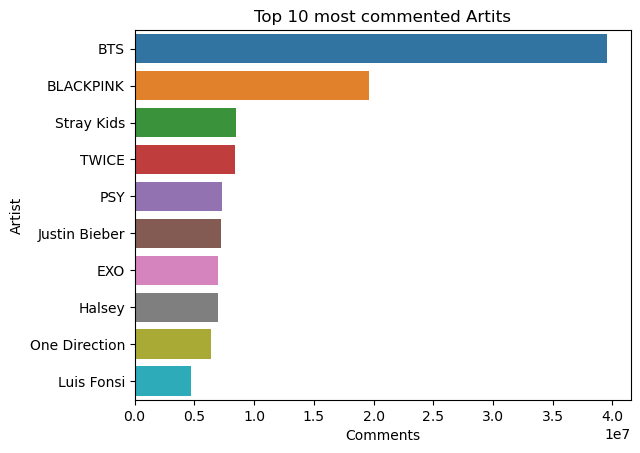

In [50]:
sns.barplot(data=ax, x='Comments', y='Artist')
plt.title('Top 10 most commented Artits')
plt.show()

In [51]:
# AGGREGATE VIES, COMMENTS, AND LIKES BASED ON ARTIST
tc=df.groupby('Track').agg({'Views':'sum','Comments':'sum', 'Likes':'sum'}).reset_index().sort_values('Views', ascending=False).head(10)
tc

,Track,Views,Comments,Likes
13145,Swalla (feat. Nicki Minaj & Ty Dolla $ign),5162403752,759525,28864162
14152,Thrift Shop (feat. Wanz),4508467245,1264245,30242165
12669,Something Just Like This,4236043204,540890,20565056
12412,Sin Pijama,4172961620,732738,17249780
12643,Somebody That I Used To Know,4114890942,1586010,29168472
2830,Con Altura,4093098189,562026,18536081
1480,Bang Bang,4002768766,578607,22355292
9682,No Me Conoce - Remix,3958118245,215069,11841081
13071,Sunflower - Spider-Man: Into the Spider-Verse,3954778068,662127,27499619
3875,Dusk Till Dawn (feat. Sia) - Radio Edit,3907550097,793267,28299420


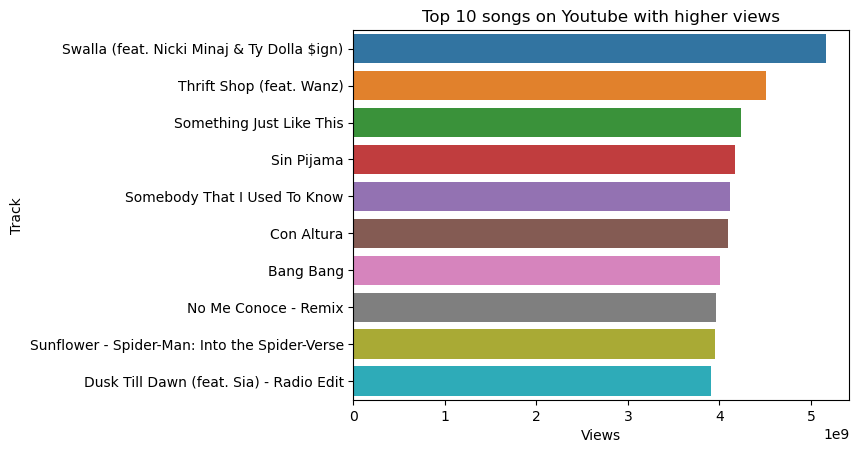

In [53]:
# What are the top 10 songs on youtube with higher views
sns.barplot(data=tc, x='Views',y='Track')
plt.title('Top 10 songs on Youtube with higher views')
plt.show()

In [57]:
# Determine the most commented song on youtube
av=df.groupby('Track').agg({'Views':'sum','Comments':'sum'}).reset_index().sort_values('Comments', ascending=False).head(10)
av

,Track,Views,Comments
3878,Dynamite,1841058866,16138145
1981,Boy With Luv (feat. Halsey),3268219993,13071440
2145,Butter,850329651,9131761
3435,Despacito,-4294967296,8505582
5032,Gangnam Style (강남스타일),-2147483648,5331537
6029,How You Like That,1182611467,5130725
1323,Baby,-2074709656,4817531
12027,See You Again (feat. Charlie Puth),-4294967296,4254691
10695,Pink Venom,530630417,3637659
10618,Permission to Dance,563221859,3486944


C:\Users\user\.VirtualBox\anacondaa\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\.VirtualBox\anacondaa\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\.VirtualBox\anacondaa\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\.VirtualBox\anacondaa\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\.VirtualBox\anacondaa\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.

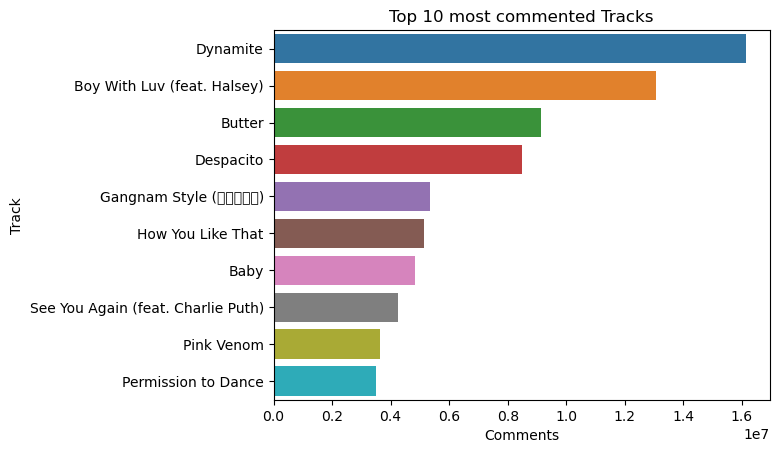

In [58]:
sns.barplot( data=av, x='Comments', y='Track')
plt.title('Top 10 most commented Tracks')
plt.show()

In [61]:
# Most liked song on YouTube or Spotify
sn=df.groupby('Track').agg({'Likes':'sum'}).reset_index().sort_values('Likes', ascending=False).head(10)
sn

,Track,Likes
3435,Despacito,101577278
12027,See You Again (feat. Charlie Puth),80295292
1981,Boy With Luv (feat. Halsey),55176413
16271,lovely (with Khalid),48852042
12151,Señorita,39692236
10060,Old Town Road - Remix,37889373
13352,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",37552053
3878,Dynamite,36609928
7698,Lean On,32422154
12178,Shape of You,31047780


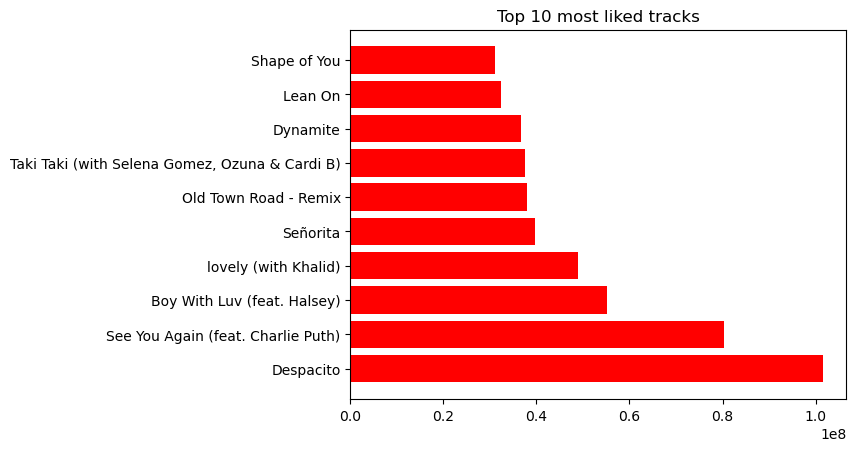

In [62]:
plt.barh(sn['Track'],sn['Likes'], color='r')
plt.title('Top 10 most liked tracks')
plt.show()

In [63]:
# Most viewed song relationship with stream
df.groupby('Track').agg({'Views':'sum','Stream':'sum'}).reset_index().sort_values(by='Views', ascending=False).head(10)

,Track,Views,Stream
13145,Swalla (feat. Nicki Minaj & Ty Dolla $ign),5162403752,3.031746e+09
14152,Thrift Shop (feat. Wanz),4508467245,2.809622e+09
12669,Something Just Like This,4236043204,4.061651e+09
12412,Sin Pijama,4172961620,1.420332e+09
12643,Somebody That I Used To Know,4114890942,2.658800e+09
2830,Con Altura,4093098189,1.360902e+09
1480,Bang Bang,4002768766,2.360285e+09
9682,No Me Conoce - Remix,3958118245,2.135471e+09
13071,Sunflower - Spider-Man: Into the Spider-Verse,3954778068,5.076660e+09
3875,Dusk Till Dawn (feat. Sia) - Radio Edit,3907550097,2.756470e+09


The reason why songs with the most views on YouTube are not the top songs on Spotify could be sue to a variety of factors.
Some songs that are popular on YouTube may not be popular on Spotify because the audiences of these two platforms have different preferences. 
Additionally, the algorithms used by each platform to recommend and promote songs may also differ, leading to differences in the popularity of songs on each platform.
Finally, other factors such as marketing and promotion by artists and record labels may also play a role in the popularity of songs on each platform.

Which is the most viewed album type

In [64]:
ac=df.groupby('Album_type')['Views'].sum().head()
ac

Album_type
album          1148761714701
compilation      48829222463
single          330054880076
Name: Views, dtype: int64

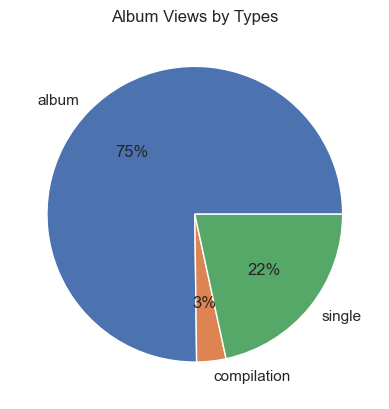

In [65]:
# And which album type is getting more views
gp=df.groupby('Album_type')['Views'].sum().reset_index()
sns.set(style='whitegrid')
plt.pie(data=gp, x='Views', labels='Album_type', autopct='%1.0f%%')
plt.title('Album Views by Types')
plt.show()

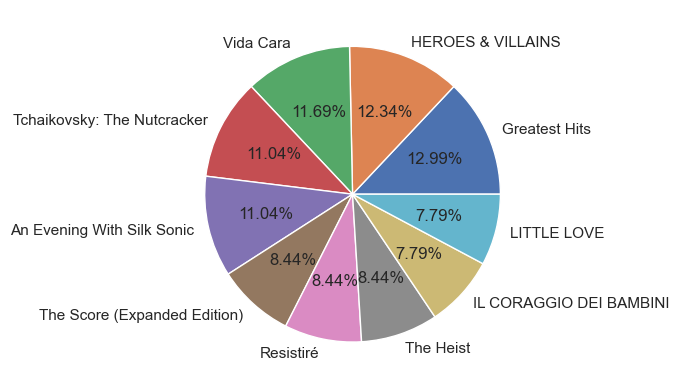

In [68]:
# TOP 10 LICENCED  ALBUM ON YOUTUBE & SPOTIFY
al=df[df['Licensed']==1]
la=al['Album'].value_counts()[:10]
plt.pie(la,autopct='%.2f%%', labels=la.index)
plt.show()

Here we can see Heroes&Villains with 12.34 records highest number of song distributor on albums

array([[<Axes: title={'center': 'Danceability'}>,
        <Axes: title={'center': 'Energy'}>,
        <Axes: title={'center': 'Key'}>,
        <Axes: title={'center': 'Loudness'}>],
       [<Axes: title={'center': 'Speechiness'}>,
        <Axes: title={'center': 'Acousticness'}>,
        <Axes: title={'center': 'Instrumentalness'}>,
        <Axes: title={'center': 'Liveness'}>],
       [<Axes: title={'center': 'Valence'}>,
        <Axes: title={'center': 'Tempo'}>,
        <Axes: title={'center': 'Duration_ms'}>,
        <Axes: title={'center': 'Views'}>],
       [<Axes: title={'center': 'Likes'}>,
        <Axes: title={'center': 'Comments'}>,
        <Axes: title={'center': 'Stream'}>, <Axes: >]], dtype=object)

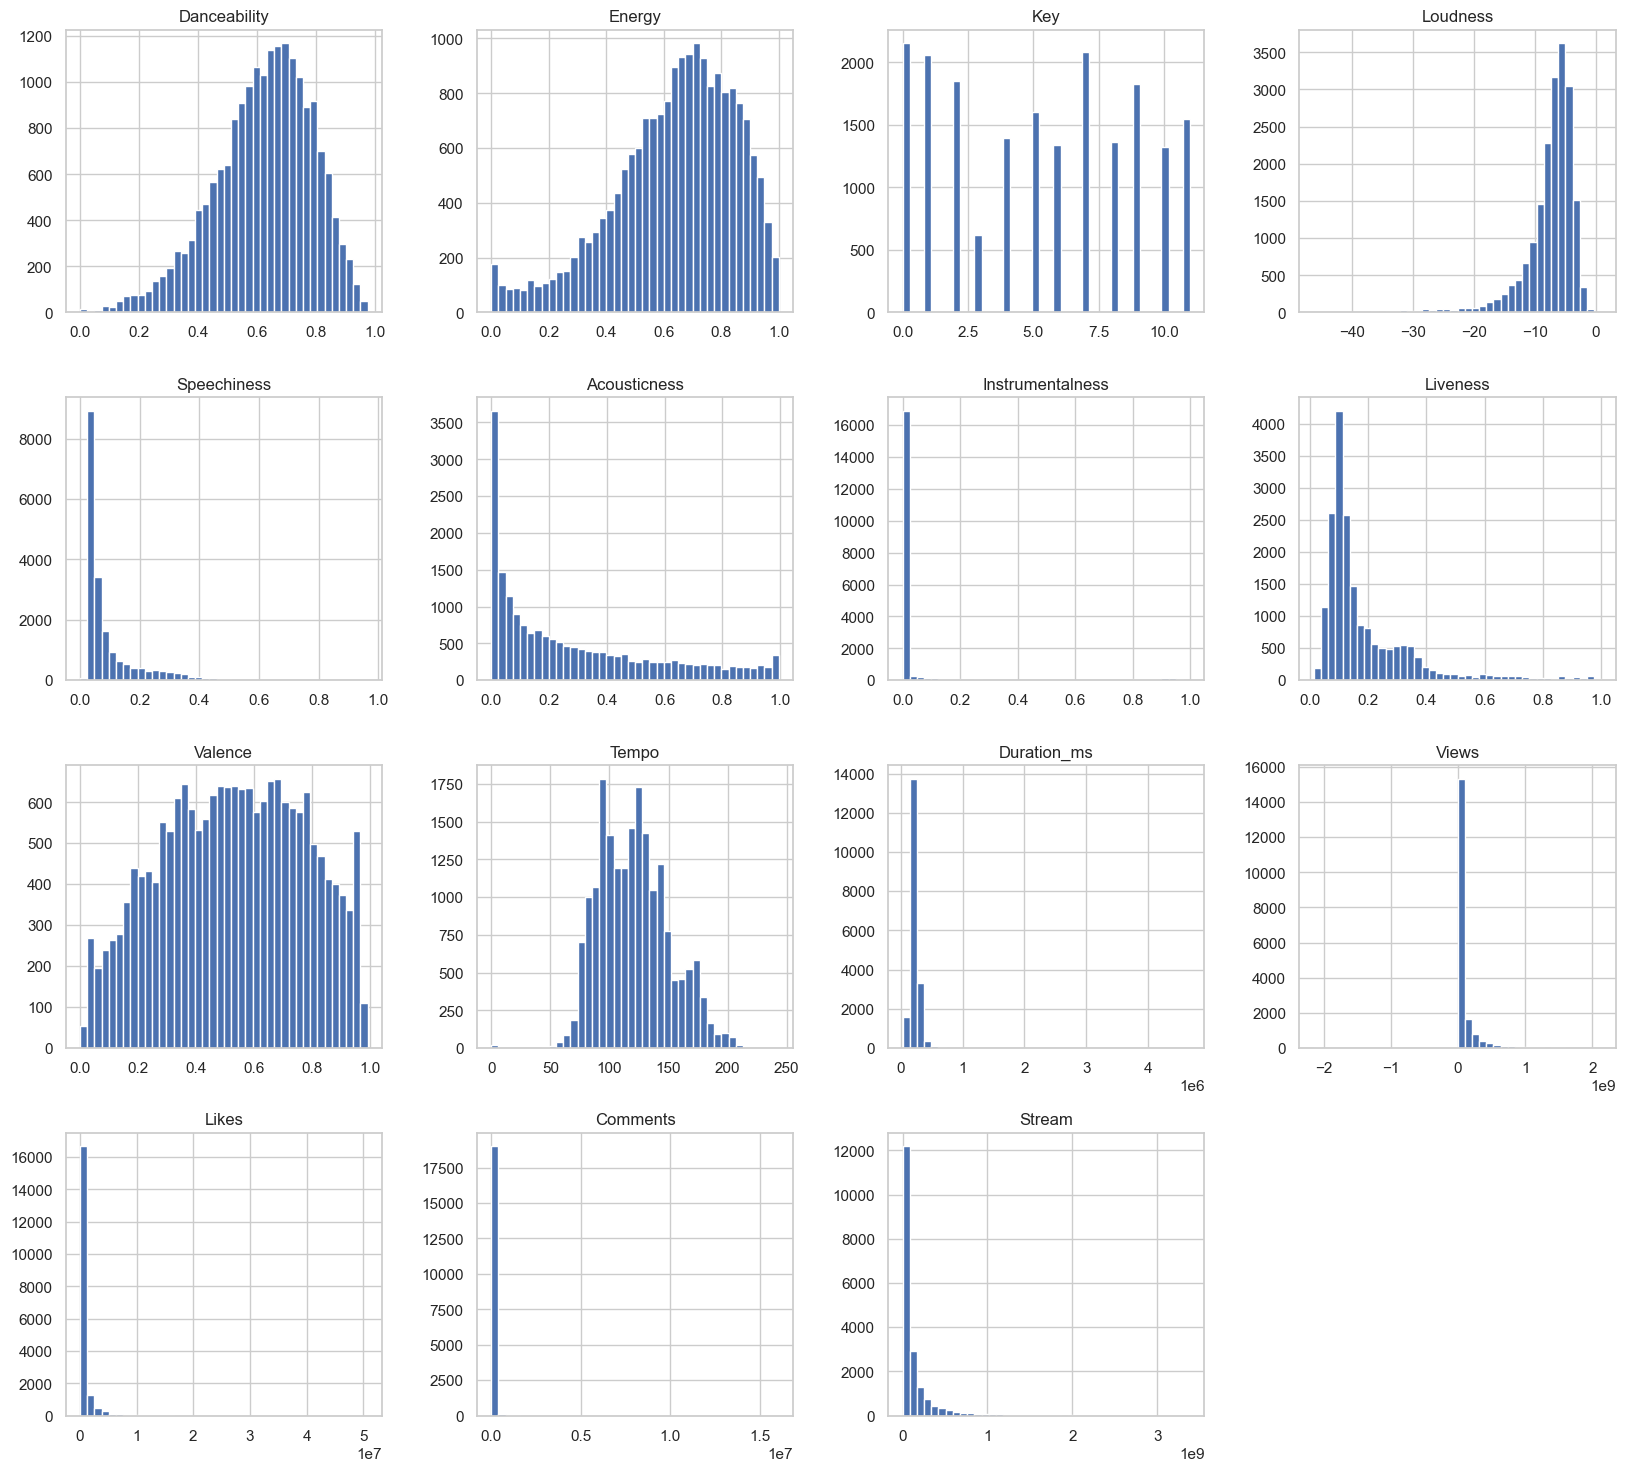

In [69]:
# MAKE A HISTOGRAM TO VISUALIZE ALL THE IMPORTANT FACTORS OF SINGERS
df.hist(bins=40, figsize=(20,18))

C:\Users\user\AppData\Local\Temp\ipykernel_14796\2234124454.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),linewidth=0.6, annot=True, fmt='.1f', linecolor='black', cmap='jet')


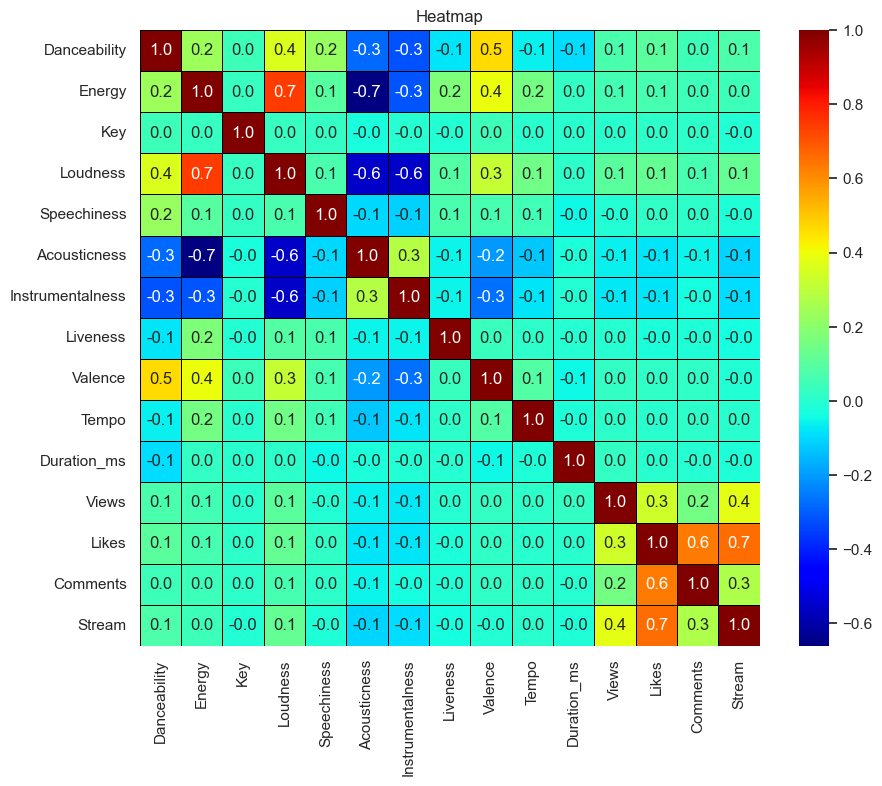

In [95]:
# DISPLAY HEATMAP
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),linewidth=0.6, annot=True, fmt='.1f', linecolor='black', cmap='jet')
plt.axis('tight')
plt.title('Heatmap')
plt.show()

This heatmap represents the correlation between the audio features.
We can see there are some positive and negative correlations.

In [72]:
# DETERMINE THE MOST VIEWED TOP 10 ALBUM ON YOUTUBE
A= df.groupby('Album')['Views'].sum().reset_index().sort_values(by='Views', ascending=False).head(10)
A

,Album,Views
9452,The Heist,11240587663
8970,Swalla (feat. Nicki Minaj & Ty Dolla $ign),5162403752
4296,Hollywood's Bleeding,5100616676
4313,Homerun,4795982636
10263,VIVES,4736798332
6038,Memories...Do Not Open,4635957165
9157,Teenage Dream,4488764640
4555,Icarus Falls,4202640870
3953,Greatest Hits,4199686140
5870,Making Mirrors,4177867606


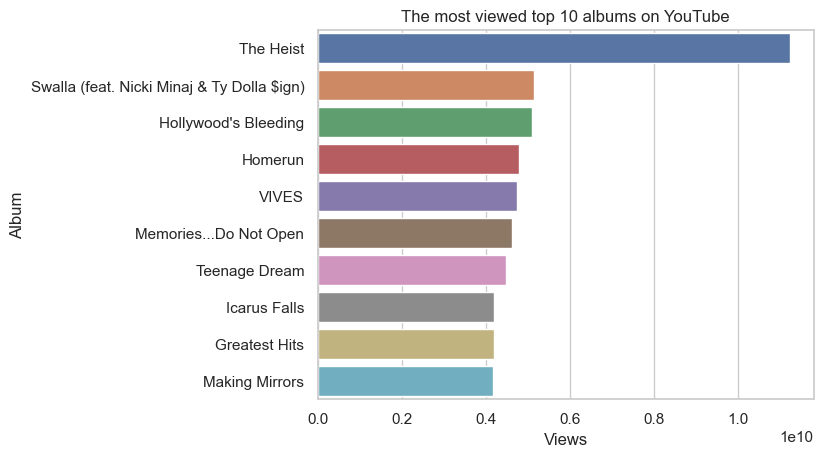

In [74]:
sns.barplot(data=A, x='Views', y='Album')
plt.title('The most viewed top 10 albums on YouTube')
plt.show()

In [76]:
# TOP STREAMED ALBUM ON YOUTUBE
C= df.groupby('Album')['Stream'].sum().reset_index().sort_values(by='Stream', ascending=False).head(10)
C

,Album,Stream
9452,The Heist,9.712794e+09
4296,Hollywood's Bleeding,9.492893e+09
10149,Un Verano Sin Ti,8.463685e+09
8039,SOUR,8.325355e+09
3671,Future Nostalgia,7.379888e+09
10597,What Is Love? (Deluxe Edition),6.874167e+09
11164,÷ (Deluxe),6.835601e+09
10259,VIDA,6.634329e+09
4915,Justice,6.537341e+09
3277,F*CK LOVE 3+: OVER YOU,6.214954e+09


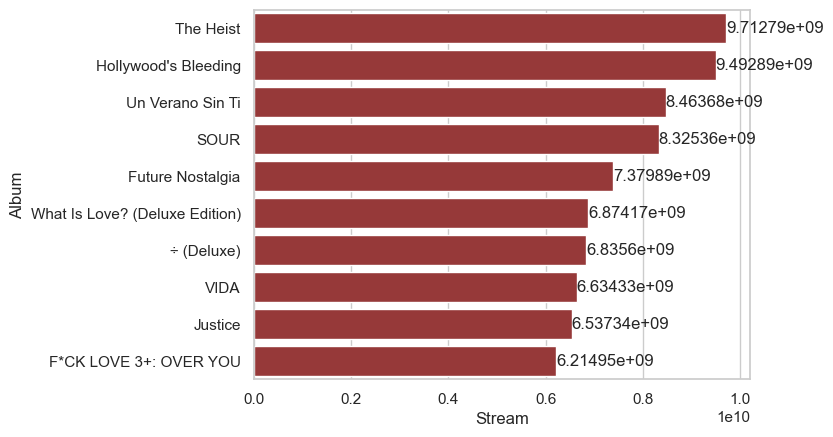

In [77]:
ax=sns.barplot(data=C, y='Album', x='Stream', color='brown')
for bars in ax.containers:
    ax.bar_label(bars)

The reason why songs with the most views on YouTube are not the top songs on Spotify could be due to a variety of factors.
Some songs that are popular on YouTube may not be as popular on Spotify because the audiences of these two platforms have diffrent preferences.
Additionally, the algorithms used by each platform to recommend and promote songs may also differ, leading to differences in the popularity of songs on each platform. 
Finally, other factors such as marketing and promotion by artists and record labels may also play a role in the popularity of songs on each platform.

In [78]:
# IDENTIFYING THE TOP 10 CHANNELS BASED ON VIEWS
a= df.groupby('Channel')['Views'].sum().reset_index().head(10)
b= a.sort_values(by='Views', ascending=False)
b

,Channel,Views
3,(G)I-DLE (여자)아이들 (Official YouTube Channel),856952624
1,$uicideboy$,300806985
2,$uicideboy$ - Topic,35372302
9,070ShakeVEVO,14117828
8,070 Shake,2655413
7,01099,1372441
6,00laurenrebeccah,701798
5,*NSYNC - Topic,206334
4,* Harbrow *,62108
0,Khalkho 4119,60765


C:\Users\user\.VirtualBox\anacondaa\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\.VirtualBox\anacondaa\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\.VirtualBox\anacondaa\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\.VirtualBox\anacondaa\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\.VirtualBox\anacondaa\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from current font.
  fig.canvas.pri

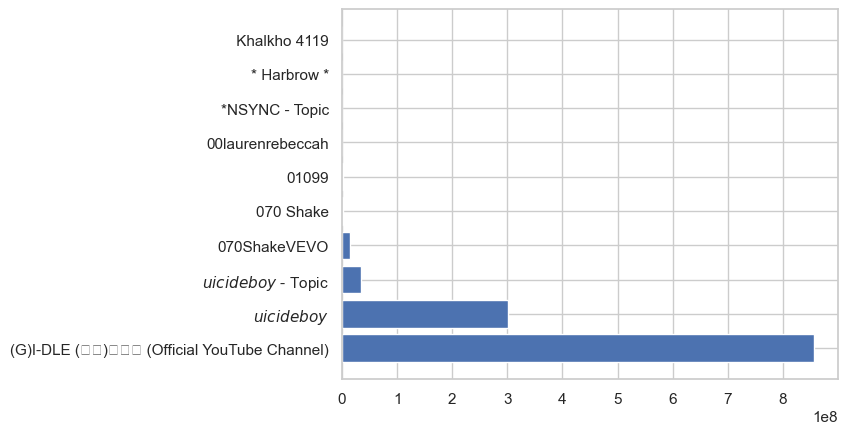

In [79]:
plt.barh(b['Channel'],b['Views'])
plt.show()

In [80]:
# WHAT ARE THE TOP LIKED CHANNEL ON YOUTUBE
a=df.groupby('Channel')['Likes'].sum().reset_index().head(10).sort_values(by='Likes', ascending=False)
a


,Channel,Likes
3,(G)I-DLE (여자)아이들 (Official YouTube Channel),13832196
1,$uicideboy$,3301561
2,$uicideboy$ - Topic,431852
9,070ShakeVEVO,400100
8,070 Shake,96240
7,01099,31362
6,00laurenrebeccah,10659
5,*NSYNC - Topic,2317
4,* Harbrow *,1636
0,Khalkho 4119,589


<Axes: xlabel='Likes', ylabel='Channel'>

C:\Users\user\.VirtualBox\anacondaa\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\.VirtualBox\anacondaa\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\.VirtualBox\anacondaa\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\.VirtualBox\anacondaa\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\.VirtualBox\anacondaa\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\.VirtualBox\anacondaa\lib\site-packages\IPython\core\pylabtools.py:152: Use

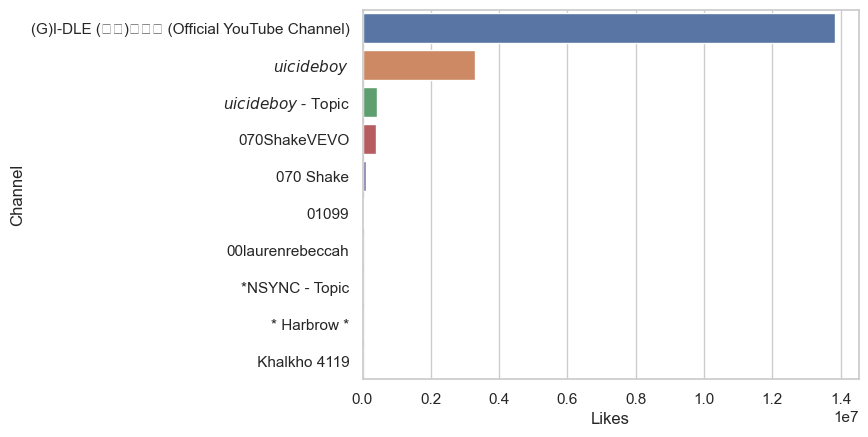

In [81]:
sns.barplot(data=a, x='Likes', y='Channel')

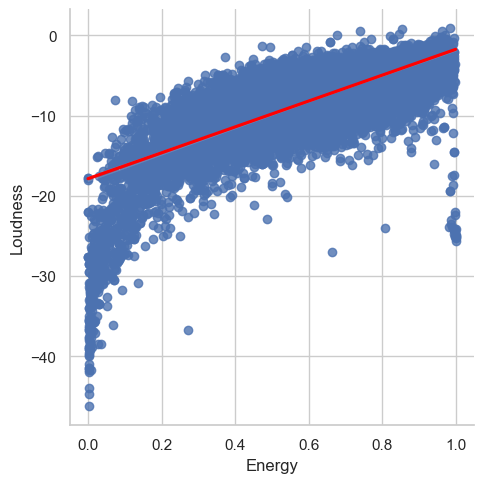

In [89]:
# DETERMINING THE RELATIONSHIP BETWEEN ENERGY AND LOUDNESS
sns.lmplot(data=df, x='Energy', y='Loudness', line_kws={'color':'red'})
plt.show()

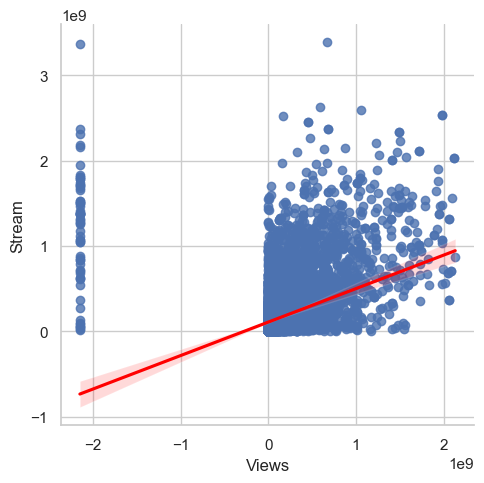

In [90]:
# THE RELATIONSHIP BEWTEEN VIEWS AND STREAMS
sns.lmplot(data=df, x='Views', y='Stream', line_kws={'color':'red'})
plt.show()

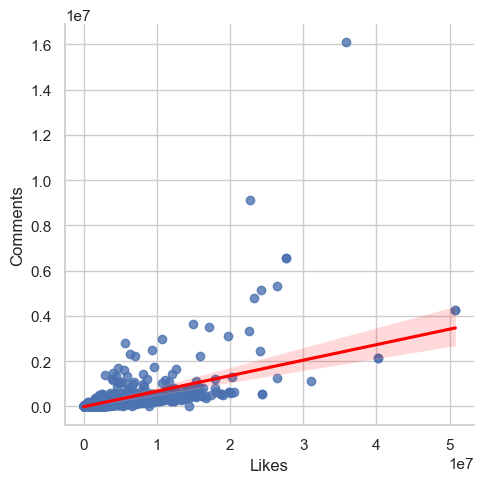

In [91]:
# THE RELATIONSHIP BETWEEN LIKE AND COMMENTS
sns.lmplot(data=df, x='Likes', y='Comments', line_kws={'color':'red'})
plt.show()

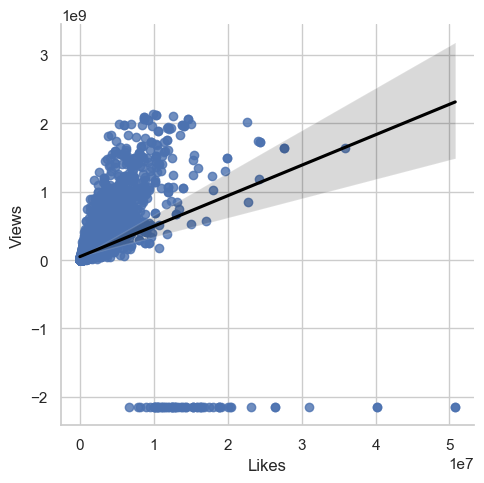

In [93]:
# THE RELATIONSHIP BETWEEN LIKE AND VIEWS
sns.lmplot(data=df, x='Likes', y='Views', line_kws={'color':'black'})
plt.grid(True)
plt.show()

In [94]:
# DETERMINE THE RELATION BETWEEN ACOUSTINESS AND ENERGY
df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Channel', 'Views',
       'Likes', 'Comments', 'Description', 'Licensed', 'official_video',
       'Stream'],
      dtype='object')

Text(0.5, 33.249999999999986, 'Acoustiness')

<Figure size 1000x500 with 0 Axes>

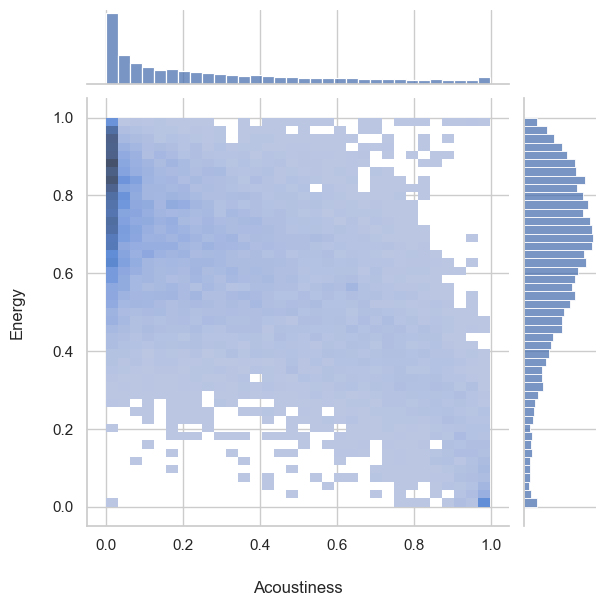

In [96]:
fig=plt.figure(figsize=(10,5))
sns.jointplot(data=df, x='Acousticness', y='Energy', kind='hist')
plt.ylabel('Energy', labelpad=20)
plt.xlabel('Acoustiness', labelpad=20)

A track with high acousticness is likely to be composed of mostly acoustic instruments, such as guitar, piano or strings, whereas a track with low acousticness is likely to be composed of mostly electronic instruments. 
A negative correlation between energy(left side) and acousticness indicated that as the energy of a track increases, the amount of acoustic instruments decreases, and vice versa.
We can see the similar patterns for loudness(right side) also. Where acousticness tend to decrease as loudness increase.

(-12.168600000000001, 255.5406, -0.0482, 1.0122)

<Figure size 1000x500 with 0 Axes>

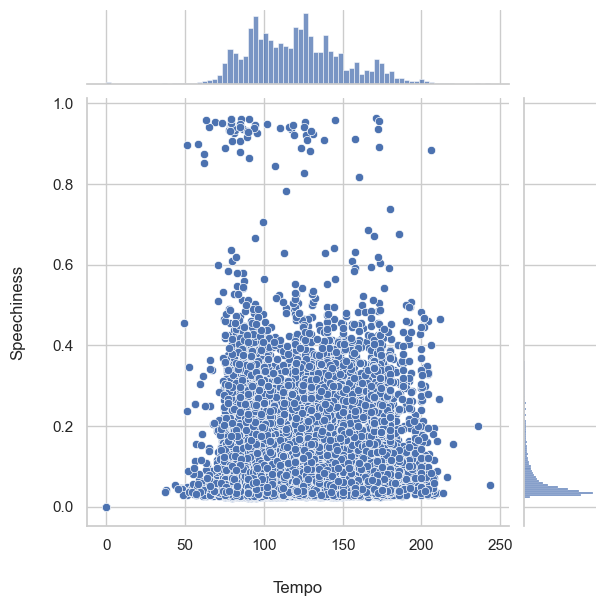

In [97]:
# DETERMINE THE RELATIONSHIP BETWEEN TEMPO AND SPEECHINESS
fig=plt.figure(figsize=(10,5))
sns.jointplot(data=df, x='Tempo', y='Speechiness', kind='scatter')
plt.ylabel('Speechiness', labelpad=20)
plt.xlabel('Tempo', labelpad=20)
plt.axis('tight')

<Figure size 1000x500 with 0 Axes>

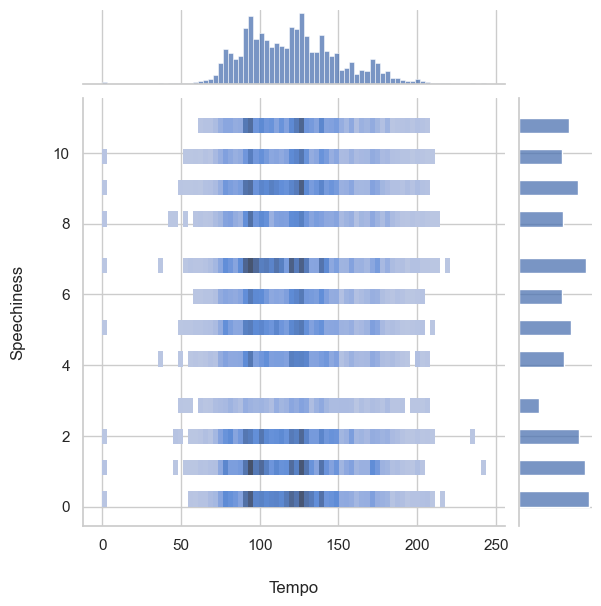

In [98]:
# DETERMINE THE RELATIONSHIP BETWEEN TEMPO AND KEY
fig=plt.figure(figsize=(10,5))
sns.jointplot(data=df, x='Tempo', y='Key', kind='hist')
plt.ylabel('Speechiness', labelpad=20)
plt.xlabel('Tempo', labelpad=20)
plt.show()

The key of a song can influence its emotional tone and can also affect its perceived tempo.
For example, a song in a minor key might have a slower perceived tempo than a song in a major key, even if the actual tempo is the same.

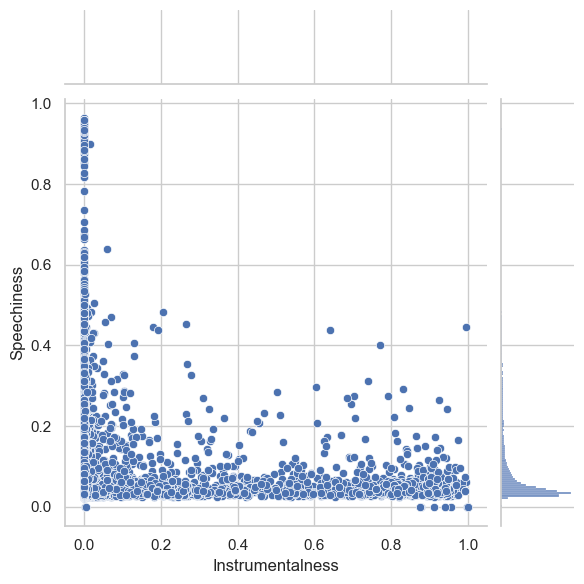

In [99]:
# RELATIONSHIP BETWEEN INSTRUMENTALNESS AND SPEECHINESS
sns.jointplot(data=df, x='Instrumentalness', y='Speechiness', kind='scatter')
plt.show()

These two columns are often inversely related, as songs with a higher level of speechiness often have a lower of instrumentalness. This is because spoken word or rap tends to be more focused on the lyrics and vocal delivery, while instrumental music tends to be more focused on the music itself.

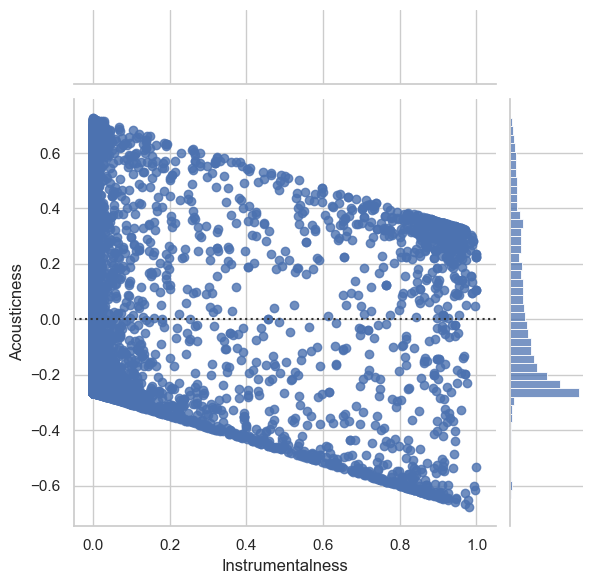

In [100]:
# RELATIONSHIP BETWEEN INSTRUMENTALNESS AND ACOUSTICNESS
sns.jointplot(data=df, x='Instrumentalness', y='Acousticness', kind='resid')
plt.show()

These two columns are often positively correlated, meaning that songs with high level of acousticness also tend to have high levels of instrumentalness. This is because acoustic instruments are often used to create instrumental music and instrumental music often features acoustic instruments.

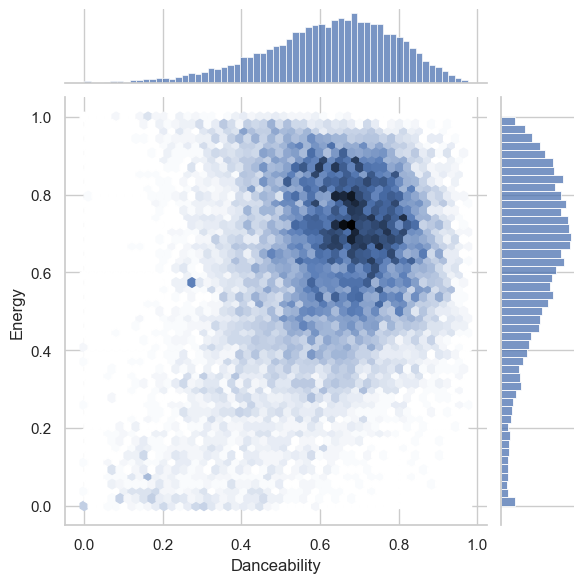

In [101]:
# RELATIONSHIP BETWEENN DANCEABILITY AND ENERGY
sns.jointplot(data=df, x='Danceability', y='Energy', kind='hex')
plt.show()

These two columns can be closely related, as songs with high danceability often have a high energy level as well. This is because danaceable energy typically have a strong and consistent beat that encourages movement, which often correlates with a high energy sound.

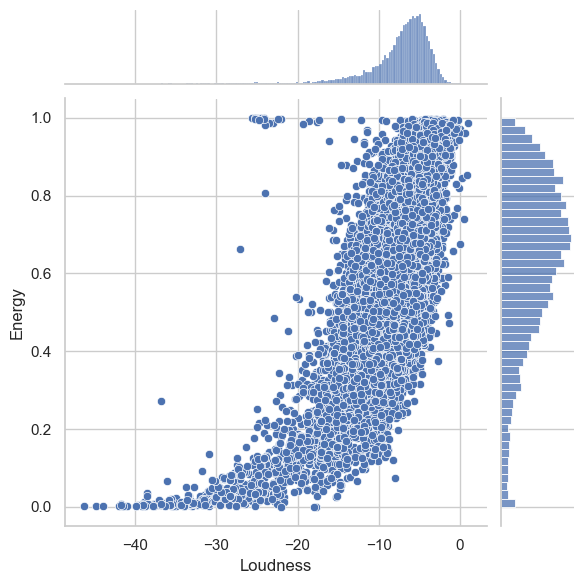

In [102]:
# RELATIONSHIP BETWEEN LOUDNESS AND ENERGY
sns.jointplot(data=df, x='Loudness', y='Energy', kind='scatter')
plt.show()

Loudness and Energy are two audio features that are commonly used to describe music.
Loudness refers to the perceived volume of a song while Energy refers to the intensity or activity level of a song.
In general, songs with high loudness tend to have high energy as well, as they are often more intense and dynamic.
However, we can see there are some songs that have high energy without being particularly loud, or vice versa.

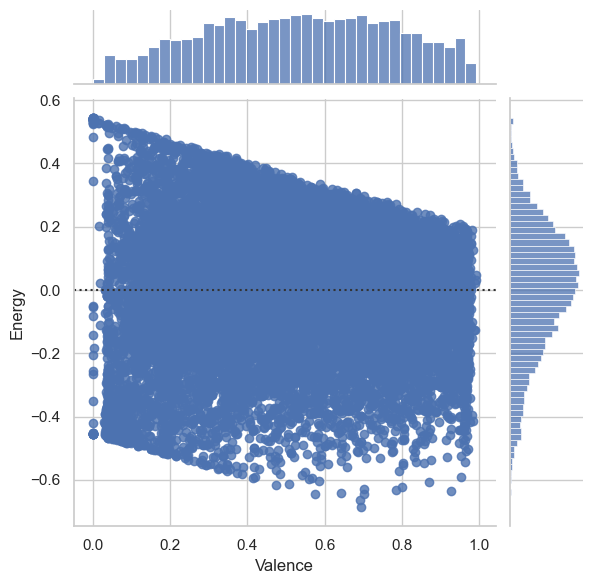

In [103]:
# RELATIONSHIP BETWEEN VALENCE AND ENERGY
sns.jointplot(data=df, x='Valence', y='Energy', kind='resid')
plt.show()

There is often a positive correlation between energy and valence, meaning that songs with high energy levels tend to have a more positive emotional tone.
This may be because high energy songs often have a more upbeat and lively sound that is associated with positive emotions like happiness and excitement.

CONCLUSION:


Music is not just a medium of timepass or entertainment its a universal language that connects people across world with different cultures. But how do people choose what music to listen to and where to listen to?
We found that there is a clear difference between the most popular songs on Spotify and YouTube, with the top songs on YouTube having more views but not necessarily the most streams on Spotify. Why is that? Is it because YouTube offers more variety, more visuals, or more interaction? Or is it because Spotify users have different tastes, different moods, or different habits?
We also found a strong positive correlation between the loudness and energy, indicating that more energetic tracks tend to be more loud. This makes sense, as people often listen to music to boost their mood, express their emotions, or have fun. 
There was also a negative correlation between energy and acousticness,indicating that as the energy of a track increases, the amount of acoustic instrument decreases. This suggests that electronic music is more popular than acoustic music when it comes to high-energy tracks. 
Finally, we found that albums are the most popular type of release, with singles and compilations making up a smaller proportion of the releases. This implies that music listeners still value the conecpt of an album as a coherent artistic expression, rather than just a collection of songs.
What do you think? Do you agree with these insights? Do they reflect your own musical preferences and habits? Or do you have a different perspective on music and how to enjoy it?
Feel free to share your thoughts and opinions.